In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib as mt
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score
import sklearn.metrics as skm


In [2]:
import tensorflow as tf
tf.__version__

'2.1.0'

#### Reading dataset

In [3]:
data=pd.read_csv('NLP DATASET.csv',error_bad_lines=False)
data.head()


b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [4]:
data['strength'].unique()

array([1, 2, 0], dtype=int64)

#### code to check all the missing values in my dataset (Data cleaning)

In [5]:
data.isna().sum()

password    1
strength    0
dtype: int64

In [6]:
data[data['password'].isnull()]

,password,strength
367579,NaN,0


In [7]:
data.dropna(inplace=True)

In [8]:
data.isnull().sum()

password    0
strength    0
dtype: int64

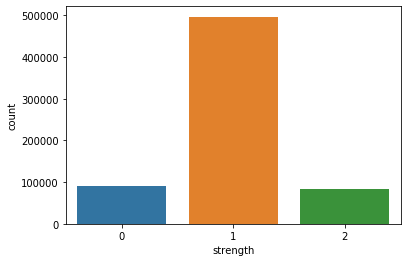

In [9]:
sns.countplot(data['strength'])

In [10]:
password_tuple=np.array(data)

In [11]:
password_tuple

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

#### shuffling randomly for robustness and to avoid data imbalance

In [12]:
import random
random.shuffle(password_tuple)

In [13]:
x=[labels[0] for labels in password_tuple]
y=[labels[1] for labels in password_tuple]


In [14]:
x

['kzde5577',
 'kzde5577',
 'kzde5577',
 'kzde5577',
 'megzy123',
 'megzy123',
 'kzde5577',
 'kzde5577',
 'v1118714',
 'AVYq1lDE4MgAZfNt',
 'v1118714',
 'as326159',
 'jytifok873',
 'WUt9IZzE0OQ7PkNE',
 'kino3434',
 'as326159',
 'visi7k1yr',
 'kzde5577',
 'WUt9IZzE0OQ7PkNE',
 'universe2908',
 'AVYq1lDE4MgAZfNt',
 'as326159',
 'intel1',
 'jytifok873',
 'universe2908',
 'elyass15@ajilent-ci',
 'g067057895',
 'asv5o9yu',
 'megzy123',
 'lamborghin1',
 'faranumar91',
 'as326159',
 'jerusalem393',
 'g067057895',
 'v1118714',
 'lsdlsd1',
 'universe2908',
 'jytifok873',
 'prisonbreak1',
 'fahad123',
 'trabajonet9',
 'klara-tershina3H',
 'yitbos77',
 'kswa2mrv',
 'klara-tershina3H',
 'elyass15@ajilent-ci',
 'fahad123',
 'idofo673',
 'klara-tershina3H',
 'faranumar91',
 'openup12',
 'WUt9IZzE0OQ7PkNE',
 'olmaz.',
 'alimagik1',
 'megzy123',
 'olmaz.',
 'u6c8vhow',
 'yk530mg8',
 'schalke04',
 'as326159',
 'matiofox08',
 'bozoxik602',
 'sbl571017',
 'kswa2mrv',
 'faranumar91',
 'cigicigi123',
 'olmaz

#### create a custom function to split input into characters of list

In [15]:
def word_divide_char(inputs):
    character=[]
    for i in inputs:
        character.append(i)
    return character

In [16]:
word_divide_char('kzde5577')

['k', 'z', 'd', 'e', '5', '5', '7', '7']

#### import TF-IDF vectorizer to convert String data into numerical data

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
vectorizer=TfidfVectorizer(tokenizer=word_divide_char)

#### apply TF-IDF vectorizer on data

In [19]:
X=vectorizer.fit_transform(x)

In [20]:
X.shape

(669639, 130)

In [21]:
vectorizer.get_feature_names()

['\x01',
 '\x05',
 '\x06',
 '\x0f',
 '\x10',
 '\x11',
 '\x12',
 '\x16',
 '\x17',
 '\x1b',
 '\x1c',
 '\x1e',
 ' ',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 '(',
 ')',
 '*',
 '+',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '{',
 '|',
 '}',
 '~',
 '\x7f',
 '\x81',
 '\x8d',
 '\xa0',
 '¡',
 '¦',
 '¨',
 '«',
 '¯',
 '°',
 '±',
 '²',
 '³',
 '´',
 'µ',
 '·',
 'º',
 '»',
 '¾',
 '¿',
 '×',
 'ß',
 'á',
 'â',
 'ä',
 'å',
 'æ',
 'ç',
 'è',
 'é',
 'ê',
 'í',
 'î',
 'ï',
 'ð',
 'ñ',
 'ò',
 'ó',
 'ô',
 'õ',
 'ö',
 '÷',
 'ù',
 'ú',
 'û',
 'ü',
 'ý',
 'þ',
 'ÿ',
 'ƒ',
 '—',
 '‚']

##### features

In [22]:
first_document_vector=X[0]
first_document_vector

<1x130 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [23]:
first_document_vector.T.todense()

matrix([[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.56645599],
        [0.        ],
        [0.59188569],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0

In [24]:
df=pd.DataFrame(first_document_vector.T.todense(),index=vectorizer.get_feature_names(),columns=['TF-IDF'])
df.sort_values(by=['TF-IDF'],ascending=False).astype(str).head(20)

,TF-IDF
7,0.5918856925136389
5,0.5664559926296301
z,0.33591860148397873
k,0.2916369230113256
d,0.2862097500392021
e,0.22133574656539812
»,0.0
¾,0.0
º,0.0
·,0.0


#### split data into train & test
    train---> To learn the relationship within data, 
    test-->  To do predictions, and this testing data will be unseen to my model

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25)

In [27]:
y_train

[1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 2,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 2,
 2,
 0,
 1,
 1,
 2,
 1,
 2,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 2,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,


In [28]:
type(X_train)

scipy.sparse.csr.csr_matrix

In [29]:
print(X_train)

  (0, 65)	0.253191694459189
  (0, 63)	0.3139407572190063
  (0, 56)	0.4632746516054216
  (0, 67)	0.2694091538206479
  (0, 61)	0.24529535222719484
  (0, 29)	0.51443409659805
  (0, 28)	0.229174356880776
  (0, 27)	0.19810249850330763
  (0, 52)	0.2235624974398784
  (0, 51)	0.2890891665865707
  (1, 71)	0.29307907951933215
  (1, 55)	0.24861663404501605
  (1, 65)	0.20466905860153523
  (1, 26)	0.20927490562298592
  (1, 56)	0.18724545254251856
  (1, 57)	0.26659843007107026
  (1, 35)	0.22343907027398482
  (1, 66)	0.21048838662133873
  (1, 61)	0.1982860019437337
  (1, 64)	0.2917592491775755
  (1, 69)	0.2780680755755738
  (1, 54)	0.24475542371939343
  (1, 31)	0.231252432345982
  (1, 52)	0.18071811552650807
  (1, 51)	0.46737400058525874
  :	:
  (502226, 65)	0.5721317283362897
  (502226, 63)	0.3547025276768412
  (502226, 68)	0.31066111362249704
  (502226, 56)	0.261712896708116
  (502226, 61)	0.2771442683425483
  (502226, 29)	0.2906138661365145
  (502226, 27)	0.22382393920647267
  (502226, 52)	0.25258

##### MLP 

#### Classification report

#### ROC AUC

#### ANN

#### HIDDEN LAYERS WITH 300 NEURONS EACH

##### COMPILE AND RUN THE MODEL

#### Classification Report for ANN

## ML ALGO

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
clf=LogisticRegression(random_state=0,multi_class='multinomial',n_jobs=5)

In [34]:
clf.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial', n_jobs=5, random_state=0)

#### doing prediction for specific custom data

In [35]:
dt=np.array(['%@123abcd'])
pred=vectorizer.transform(dt)
clf.predict(pred)

array([2])

#### doing prediction on X-Test data

In [36]:
y_pred=clf.predict(X_test)
y_pred

array([1, 2, 1, ..., 1, 1, 1])

#### check Accuracy of your model using confusion_matrix,accuracy_score

In [37]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [38]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
print("The accuracy is =",accuracy_score(y_test,y_pred))

[[  6524  15767     24]
 [  4802 116317   3280]
 [    51   6373  14272]]
The accuracy is = 0.8190251478406307


##### classification report

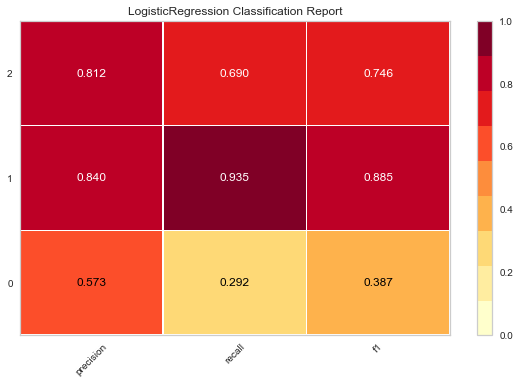

In [39]:
from sklearn.metrics import classification_report
from yellowbrick.classifier import *
visualize=ClassificationReport(clf)
visualize.fit(X_train,y_train)
visualize.score(X_test,y_test)
visualize.show(clear_figure=True)    


In [40]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(max_depth=5,random_state=2)
forest.fit(X_train, y_train)

y_pred=forest.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

### Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

# instantiate the model

# fit the model 
forest.fit(X_train, y_train)

#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

In [42]:
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))


Random forest: Accuracy on training Data: 0.770
Random forest: Accuracy on test Data: 0.771


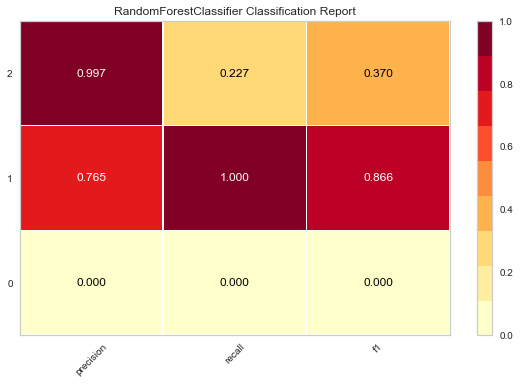

In [43]:
from yellowbrick.classifier import *
visualize=ClassificationReport(forest)
visualize.fit(X_train,y_train)
visualize.score(X_test,y_test)
visualize.show(clear_figure=True)

## Decision tree

In [44]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [45]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [46]:
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

In [47]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.813
Decision Tree: Accuracy on test Data: 0.812


### Precision recall f-measure

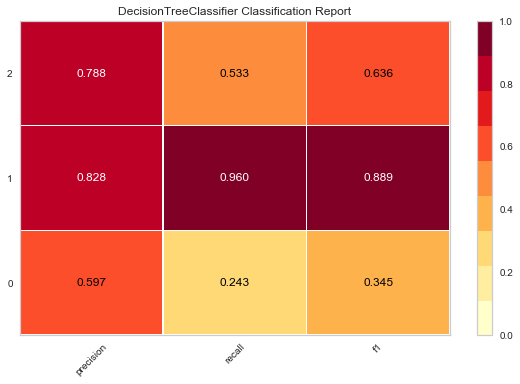

In [48]:
from yellowbrick.classifier import *
visualize=ClassificationReport(tree)
visualize.fit(X_train,y_train)
visualize.score(X_test,y_test)
visualize.show(clear_figure=True)

## XGBOOST

In [49]:
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
#fit the model
xgb.fit(X_train, y_train)

[10:53:31] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.4, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [50]:

#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

In [51]:
#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.997
XGBoost : Accuracy on test Data: 0.992


### precision recall f1 measure

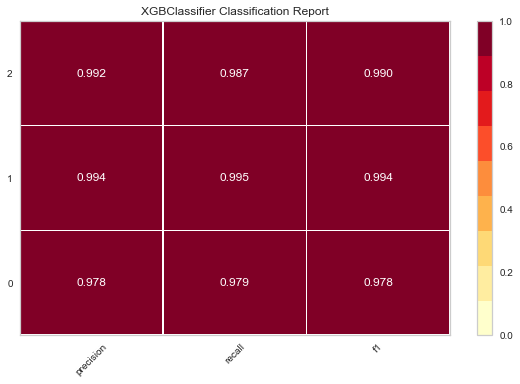

In [52]:
from yellowbrick.classifier import *
visualize=ClassificationReport(xgb)
visualize.fit(X_train,y_train)
visualize.score(X_test,y_test)
visualize.show(clear_figure=True)

### ROC-AUC CURVE


In [53]:
from sklearn.metrics import (
    roc_auc_score,
    plot_roc_curve,
)
from yellowbrick.classifier import ROCAUC

### roc graph

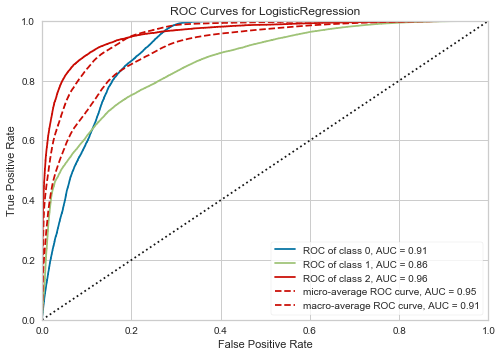

In [54]:
roc_graph_linear=ROCAUC(clf,classes=[0,1,2])
roc_graph_linear.fit(X_train,y_train)
roc_graph_linear.score(X_test,y_test)
roc_graph_linear.show()

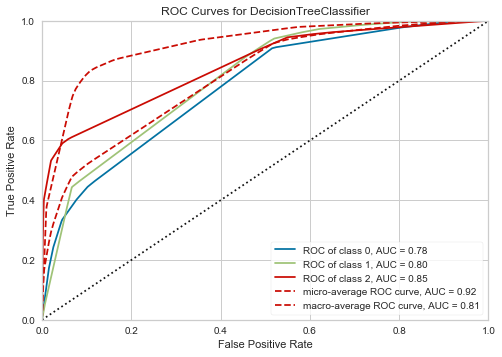

In [55]:
roc_graph_dt=ROCAUC(tree,classes=[0,1,2])
roc_graph_dt.fit(X_train,y_train)
roc_graph_dt.score(X_test,y_test)
roc_graph_dt.show()

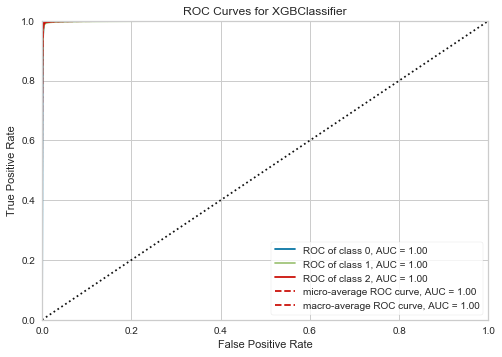

In [56]:
roc_graph_xgb=ROCAUC(xgb,classes=[0,1,2])
roc_graph_xgb.fit(X_train,y_train)
roc_graph_xgb.score(X_test,y_test)
roc_graph_xgb.show()

In [ ]:
""""autoencoder.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

#Training the model
history = autoencoder.fit(X_train, X_train, epochs=10, batch_size=64, shuffle=True, validation_split=0.2)